In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import math

In [121]:
data = pd.read_csv('ks-projects-201801.csv', encoding='utf8')

In [122]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [123]:
len(data)

378661

In [124]:
data['state'].unique()
data.groupby('state')['ID'].count().apply(lambda x: x / len(data))

state
canceled      0.102411
failed        0.522153
live          0.007392
successful    0.353762
suspended     0.004875
undefined     0.009407
Name: ID, dtype: float64

In [209]:
data.groupby(['state', 'category'])['ID'].count()

state       category         
failed      3D Printing           317
            Academic              535
            Accessories          1407
            Action                464
            Animals               118
            Animation            1432
            Anthologies           192
            Apparel              4190
            Apps                 4737
            Architecture          442
            Art                  3249
            Art Books            1026
            Audio                 199
            Bacon                  84
            Blues                 108
            Calendars             135
            Camera Equipment      156
            Candles               243
            Ceramics              125
            Children's Books     3628
            Childrenswear         295
            Chiptune                5
            Civic Design          155
            Classical Music       717
            Comedy                973
            Comic Bo

In [200]:
data[data['state'] == 'successful']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_percent,total_days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1.047500,35
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1.205000,20
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00,1.016000,30
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73,18.834995,28
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.00,1.713400,35
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.00,1.582700,30
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04,2.754125,30
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.00,1.151546,30
31,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.00,47.266000,31
32,1000120151,Feather Cast Furled Fly Fishing Leaders,Product Design,Design,AUD,2015-08-22,2000.0,2015-07-23 03:09:43,2000.00,successful,18,AU,1473.62,1427.35,1427.35,1.000000,30


In [178]:
data = data[(data.state == 'failed') | (data.state == 'successful')]
data = data[data['usd_goal_real'] >= 1000]

In [179]:
#contando anomalias
print(data[(data['backers'] == 0) & (data['usd_pledged_real'] > 0)].count())

#removendo anomalias
data = data[(data['backers'] != 0) | (data['usd_pledged_real'] == 0)]

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


In [187]:
sdias = ((pd.to_datetime(data[data.state == 'successful']['deadline']) - pd.to_datetime(data[data.state == 'successful']['launched'])).dt.days + 1)
fdias = ((pd.to_datetime(data[data.state == 'successful']['deadline']) - pd.to_datetime(data[data.state == 'successful']['launched'])).dt.days + 1)
sarr = data[data.state == 'successful']['usd_pledged_real']
farr = data[data.state == 'failed']['usd_pledged_real']

sgoal = data[data.state == 'successful']['usd_goal_real']
fgoal = data[data.state == 'failed']['usd_goal_real']

print(sdias.min())
print(sdias.max())
print(sdias.mean())

print(fdias.min())
print(fdias.max())
print(fdias.mean())

1
92
33.045831892078866
1
92
33.045831892078866


In [198]:
data[(data['total_days'] == 1) & (data['state'] == 'successful')]
#cara = data[data.apply(lambda d: ((pd.to_datetime(d['deadline']) - pd.to_datetime(d['launched'])).dt.days + 1) == 1, axis=1)]
#cara

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_percent,total_days
257510,379385592,le chocolat,Food,Food,GBP,2017-01-06,1200.0,2017-01-05 17:11:36,1209.00,successful,1,GB,0.00,1494.73,1483.61,1.007495,1
268704,43736794,Another Fucking Warhol Production,Performances,Dance,USD,2017-05-11,5000.0,2017-05-10 18:15:14,7740.26,successful,161,US,7195.26,7740.26,5000.00,1.548052,1
308876,643403472,The 1 Day Steampunk Leather Hat Project,Fashion,Fashion,CAD,2014-10-01,1400.0,2014-09-30 06:01:05,5505.00,successful,41,CA,4928.72,4922.65,1251.90,3.932143,1
343008,817440469,Burrows & Badgers: New Blood. Anthro animal mi...,Tabletop Games,Games,GBP,2016-12-27,2000.0,2016-12-26 17:04:53,17274.50,successful,339,GB,21197.79,21267.73,2462.33,8.637238,1
365411,931747986,CXL - Feature Film - The 24 Hour Kickstarter. ...,Narrative Film,Film & Video,USD,2011-07-07,5000.0,2011-07-06 19:30:17,5018.05,successful,70,US,5018.05,5018.05,5000.00,1.003610,1
377311,993249553,1st Annual Brian Kesinger Christmas Ornament,Art,Art,USD,2017-12-15,1000.0,2017-12-14 09:01:39,9244.00,successful,59,US,9244.00,9244.00,1000.00,9.244000,1


In [183]:
failed = data[data.state == 'failed']
successful = data[data.state == 'successful']

def metric1(value): 
    return (((value['usd_pledged_real'] / value['usd_goal_real']) * 100) / value['backers']).apply(lambda m : 0 if math.isnan(m) or math.isinf(m) else m)

def dictmetric1(value): 
        return zip((((value['usd_pledged_real'] / value['usd_goal_real']) * 100) / value['backers']).apply(lambda m : 0 if math.isnan(m) or math.isinf(m) else m), value['name'])
    
suc = dictmetric1(successful)

for v in suc: 
    if v[0] < 0.004:
        print(v[1])
        
cara = data[data['name'] == 'The Veronica Mars Movie Project']
cara

# print('failed', metric1(failed).mean())
# print('successful', metric1(successful).mean())

# print('failed', metric1(failed).min())
# print('successful', metric1(successful).min())

# print('failed', metric1(failed).max())
# print('successful', metric1(successful).max())


The Veronica Mars Movie Project
WISH I WAS HERE
The Bards Tale IV


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.0


In [51]:
data = data.drop(['ID'], axis=1)

In [194]:
data['goal_percent'] = data['usd_pledged_real'] / data['usd_goal_real']
data['total_days'] = (pd.to_datetime(data['deadline']) - pd.to_datetime(data['launched'])).dt.days + 1

In [72]:
data = data.drop(['deadline', 'launched', 'goal', 'pledged', 'usd_pledged_real', 'usd_goal_real', 'usd pledged'], axis=1)

In [73]:
def uncategorize_column(column):
    unique_values = data[column].unique()
    dict_values = {unique_values[i] : i for i in range(len(unique_values))}
    data[column + '_code'] = data[column].apply(lambda x: dict_values[x])

In [74]:
uncategorize_column('category')
uncategorize_column('main_category')
uncategorize_column('state')
uncategorize_column('country')
uncategorize_column('currency')

In [75]:
data = data.drop(['category', 'main_category', 'state', 'country', 'currency'], axis=1)

In [29]:
vectorizer = CountVectorizer(max_features=200, stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(data['name'].astype('str').tolist())
print(vectorizer.get_feature_names())

#print(X.toarray())  

['100', '2012', '2013', '2014', '2015', '2016', '3d', 'action', 'adventure', 'adventures', 'album', 'america', 'american', 'app', 'apparel', 'art', 'artist', 'arts', 'band', 'best', 'better', 'big', 'black', 'board', 'book', 'books', 'box', 'bring', 'build', 'cafe', 'calendar', 'card', 'cards', 'case', 'cd', 'children', 'christmas', 'city', 'clothing', 'coffee', 'collection', 'com', 'comedy', 'comic', 'community', 'company', 'create', 'custom', 'dance', 'dark', 'day', 'dead', 'debut', 'design', 'dice', 'digital', 'documentary', 'dog', 'dream', 'earth', 'edition', 'enamel', 'ep', 'experience', 'family', 'fantasy', 'farm', 'fashion', 'feature', 'festival', 'fi', 'film', 'food', 'free', 'fun', 'fund', 'future', 'game', 'games', 'gaming', 'girl', 'good', 'graphic', 'great', 'guide', 'hand', 'handmade', 'heart', 'help', 'high', 'history', 'home', 'horror', 'house', 'inspired', 'iphone', 'issue', 'journey', 'just', 'kids', 'la', 'launch', 'leather', 'length', 'let', 'life', 'light', 'like', 

In [28]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(vectorizer.get_feature_names(),
               mutual_info_classif(X, data['state_code'].tolist(), discrete_features=True)
               ))
sorted(res.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse=True)

ValueError: could not convert string to float: 'The Songs of Adelaide & Abullah'

In [20]:
import sys
!{sys.executable} -m pip install tabulate

In [52]:
array = data.values
y = array[:, 6]
type(y[1])

int

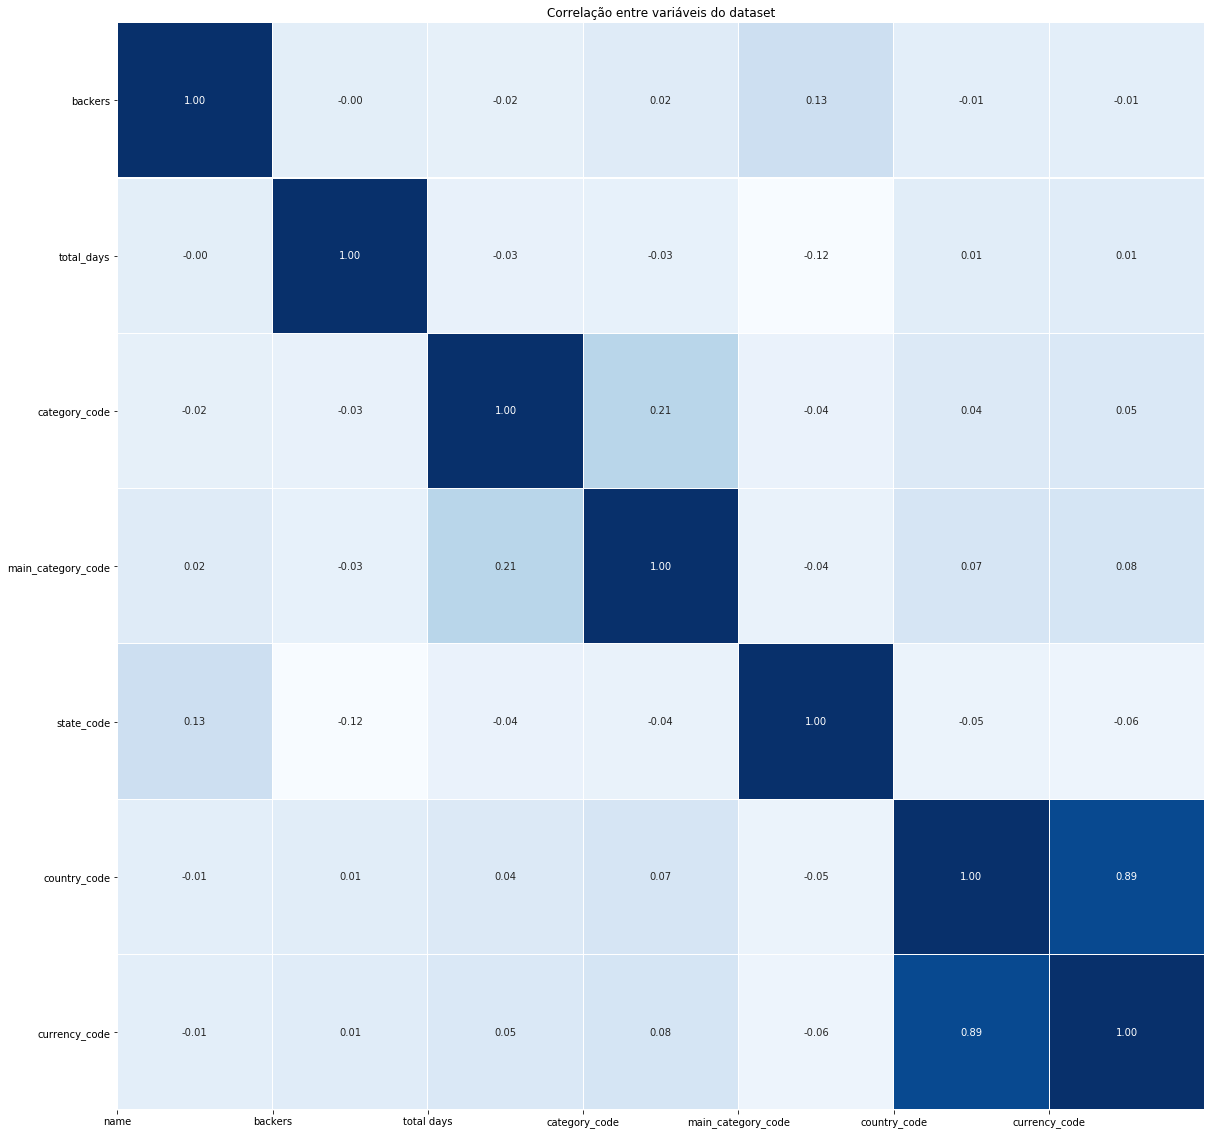

[0 0 0 0 1 1 0 0 1 0]
[0 0 0 0 1 1 0 0 1 0]


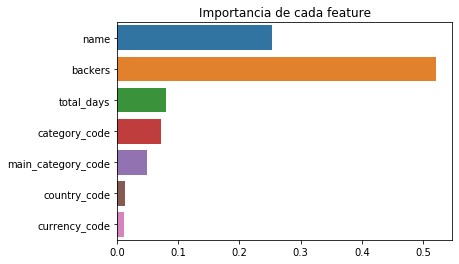

name                    score
backers             0.521443
name                0.253692
total_days          0.0799817
category_code       0.0722266
main_category_code  0.0483957
country_code        0.0129168
currency_code       0.011344


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

#carregamento dos dados
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = data.drop('goal_percent', axis=1)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap='Blues', linewidths=0.02, square=True, cbar=False, ax = ax)
plt.yticks(rotation='horizontal')
plt.xticks((np.arange(7)), ('name', 'backers', 'total days', 'category_code', 'main_category_code', 'country_code', 'currency_code'))
plt.title('Correlação entre variáveis do dataset')
plt.savefig('correlacao3.png')
plt.show()


array = data.values
y = array[:, 5]
print(y[:10])
#transforma categoricos em numericos
le = LabelEncoder()
for index, item in enumerate(data.columns):
    if index in range(15):
        #print(dataset[item])

        data[item] = le.fit_transform(data[item].astype(str))
    else:
        pass

#feature importance
array = data.values
y = array[:, 5]
print(y[:10])
dataset = data.drop('state_code', axis=1)
X = dataset.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = RandomForestClassifier(n_estimators=10, random_state=10)
model.fit(X_train, y_train)# Mostrando importância de cada feature
importances = pd.Series(data=model.feature_importances_, index=dataset.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importancia de cada feature')
plt.savefig('importancia3.png')
plt.show()

headers = ["name", "score"]
values = sorted(zip(dataset.columns, model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

In [17]:
data

,name,backers,goal_percent,total_days,category_code,main_category_code,state_code,country_code,currency_code
0,The Songs of Adelaide & Abullah,0,0.000000,59,0,0,0,0,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,15,0.080700,60,1,1,0,1,1
2,Where is Hank?,3,0.004889,45,1,1,0,1,1
3,ToshiCapital Rekordz Needs Help to Complete Album,1,0.000200,30,2,2,0,1,1
5,Monarch Espresso Bar,224,1.047500,35,3,3,1,1,1
6,Support Solar Roasted Coffee & Green Energy! ...,16,1.205000,20,4,3,1,1,1
7,Chaser Strips. Our Strips make Shots their B*tch!,40,0.018120,45,5,3,0,1,1
10,Of Jesus and Madmen,0,0.000000,30,6,0,0,2,2
11,Lisa Lim New CD!,100,1.016000,30,7,2,1,1,1
12,The Cottage Market,0,0.000000,30,8,4,0,1,1
